<a href="https://colab.research.google.com/github/RifatMuhtasim/NLP_Natural_Language_Processing/blob/main/Learn/18.TF_IDF_Text_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecommerce Category Classfication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/12_tf_idf/Ecommerce_data.csv")
print("Shape: ", df.shape)
df.head()

Shape:  (24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


## Text Extraction & Cleanup

In [3]:
#check label value counts
df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

Here, this dataset is balanced.

In [4]:
#convert label string to numeric
target = {'Household': 0, 'Electronics': 1, 'Clothing & Accessories': 2, 'Books': 3}

df['label'] = df['label'].map(target)
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,0
1,"Contrast living Wooden Decorative Box,Painted ...",0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,2
4,Indira Designer Women's Art Mysore Silk Saree ...,2


## Pre-processsing

In [5]:
#remove stop words and punctuations and return with base word
nlp = spacy.load("en_core_web_sm")

def Preprocess(text):
    doc = nlp(text)

    filtered_list = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_list.append(token.lemma_)  #use base word

    return " ".join(filtered_list)

In [6]:
#preprocess Text Column
df['Text'] = df['Text'].apply(Preprocess)
df.head()

,Text,label
0,Urban Ladder Eisner low Study Office Computer ...,0
1,contrast live Wooden Decorative Box Painted Bo...,0
2,IO Crest SY PCI40010 PCI raid Host Controller ...,1
3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...,2
4,Indira Designer Women Art Mysore Silk Saree Bl...,2


## Feature Engineering (TF-IDF Vectorizer)

In [7]:
#train test split
X = df['Text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y , random_state=42)

In [8]:
#convert word to number
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
v.fit(X_train.values)
X_train_counts = v.transform(X_train.values)

## Model Building

In [9]:
#MutlinomialNB model
model = MultinomialNB()
model.fit(X_train_counts, y_train)

#convert X_test to numerical one
X_test_counts = v.transform(X_test.values)

#prediction
y_pred = model.predict(X_test_counts)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score: ", accuracy)

Accuracy Score:  0.965


## Evaluation

In [10]:
#classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1200
           1       0.97      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.99      0.94      0.96      1200

    accuracy                           0.96      4800
   macro avg       0.97      0.96      0.97      4800
weighted avg       0.97      0.96      0.97      4800



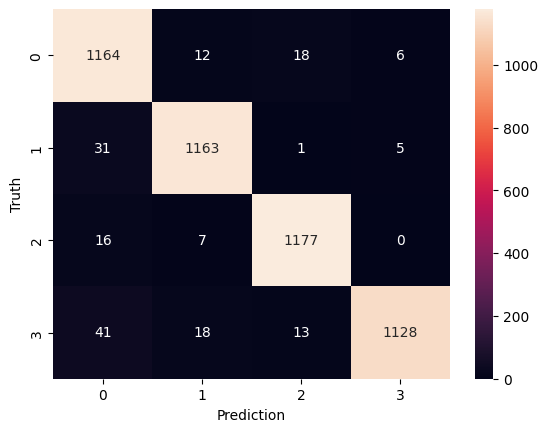

In [11]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()